In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, MinMaxScaler  # for preprocessing
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error  # metrics
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  # getting models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import SVR

Loading Dataset

In [4]:
dataset = pd.read_csv('insurance.csv')
df = dataset.copy()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
# To get statistical summary of the numeric data

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


Data Visualization

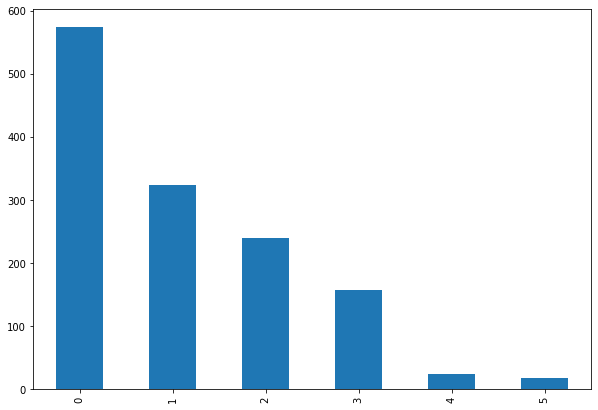

In [10]:
# Analyzing the number of children

plt.figure(figsize=(10,7))
df['children'].value_counts().plot.bar()

In [11]:
# To see the percentage of the sex

df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

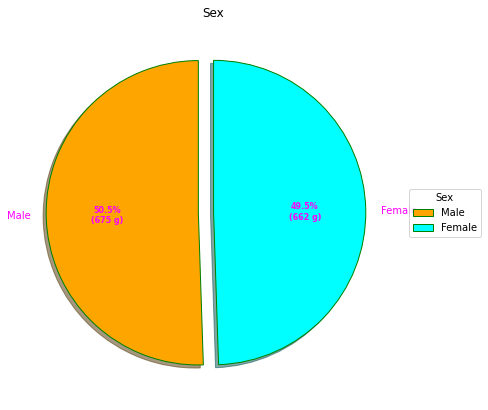

In [15]:
fig, ax = plt.subplots(figsize=(10,7))

sex = ['Male', 'Female']

data = list(df['sex'].value_counts().values)

# Creating explode data
explode = (0.1, 0.0)

# Creating color parameters
colors = ("orange", "cyan")

# Wedge properties 
wp = {'linewidth': 1, 
      'edgecolor': "green"}

def func(pct, allvalues):
  absolute = int(pct / 100.*np.sum(allvalues))
  return "{:.1f}%\n({:d} g)".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode,
                                  labels = sex,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color= 'magenta'))

ax.legend(wedges, sex,
          title = "Sex",
          loc = "center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")
ax.set_title("Sex")

plt.show()


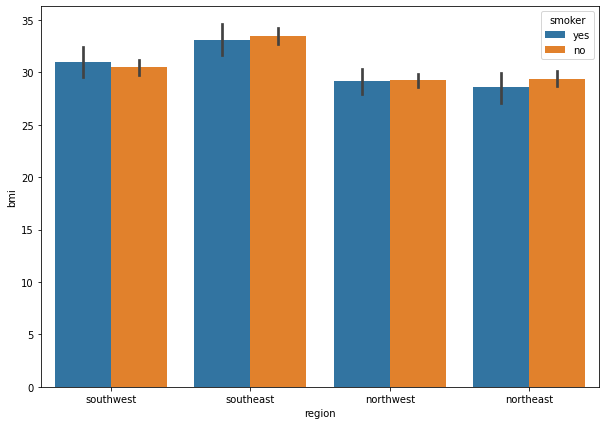

In [16]:
# To see which state has the most smoker
plt.figure(figsize=(10,7))

sns.barplot(x='region', y='bmi', hue='smoker', data=df);

## Preprocessing

### Label Encoding

In [28]:
def label_encoding(column_name):
  label_encoder = LabelEncoder()
  df[column_name] = label_encoder.fit_transform(df[column_name])

In [29]:
label_encoding('smoker')
label_encoding('sex')

In [30]:
df.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest,...,southeast,southwest,northeast,northwest,southeast,southwest,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0


## One-Hot Encoding

In [31]:
one_hot = pd.get_dummies(df['region'])
one_hot.head()

KeyError: ignored

In [33]:
df = pd.concat([df, one_hot], axis=1)
df.drop('region', axis=1, inplace=True)

# now our data is all numerical

KeyError: ignored

In [34]:
df.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest,...,southeast,southwest,northeast,northwest,southeast,southwest,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0


# Splitting Dataset

In [35]:
X = df.drop('charges', axis=1)
y = df['charges']

# Feature Scaling

In [37]:
# There are two main types of feature scaling.
## Normalization: This rescales all values to between 0 and 1
## Standardization: This subtracts the mean value from all of the features

In [38]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X[0:5]

array([[0.02173913, 0.        , 0.3212268 , 0.        , 1.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.47914985, 0.2       , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 1.        , 0.        ],
       [0.2173913 , 1.        , 0.45843422, 0.6       , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
  

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [40]:
print(f"""
Shape of X Train: {X_train.shape}
Shape of y Train: {y_train.shape}
Shape of X test: {X_test.shape}
Shape of y test: {y_test.shape}
""")


Shape of X Train: (1070, 29)
Shape of y Train: (1070,)
Shape of X test: (268, 29)
Shape of y test: (268,)



## Model Selection

In [41]:
# Models 

linreg = LinearRegression()
DecTree = DecisionTreeRegressor()
RandForest = RandomForestRegressor()
SVM = SVR()

In [ ]:
# Cross Validation is an evaluation metric which tatkes in model, X, y, number of k(folds of cross validation and scoring parameter)


In [42]:
linreg_scores = cross_val_score(linreg,
                                X_train, y_train,
                                scoring='neg_mean_squared_error',
                                cv=10)

In [43]:
linreg_scores

array([-36895719.34607364, -43307871.90469342, -27472098.56837687,
       -37695345.25423038, -34149627.42258301, -37370661.47725088,
       -52947150.48720495, -40025788.10797182, -37909477.06974982,
       -31999397.26778109])

In [44]:
DecTree_scores = cross_val_score(DecTree,
                                 X_train, y_train,
                                 scoring='neg_mean_squared_error',
                                 cv=10)

In [45]:
RandForest_scores = cross_val_score(RandForest,
                                    X_train, y_train,
                                    scoring='neg_mean_squared_error',
                                    cv=10)

In [48]:
SVM_scores = cross_val_score(SVM,
                             X_train, y_train,
                             scoring='neg_mean_squared_error',
                             cv=10)

In [49]:
def score_display(scores):
  scores = np.sqrt(-scores)
  print(f"""
  RMSE Scores : {scores}
  Mean : {scores.mean()} 
  Standard Devation : {scores.std()}
  """)

In [50]:
score_display(linreg_scores)


  RMSE Scores : [6074.18466513 6580.87166754 5241.3832686  6139.65351256 5843.76825538
 6113.15478924 7276.47926453 6326.59372079 6157.06724584 5656.80097474]
  Mean : 6140.9957364352695 
  Standard Devation : 515.2524193785325
  


In [51]:
score_display(DecTree_scores)


  RMSE Scores : [5996.6204127  6551.6350434  6885.10188842 7237.04540992 6693.56778585
 6266.01991938 7553.28430793 6909.97371866 7150.34806973 5961.54561059]
  Mean : 6720.514216658582 
  Standard Devation : 504.37273720353164
  


In [52]:
score_display(RandForest_scores)


  RMSE Scores : [4792.76125566 5211.53376133 3955.98656871 4458.57052912 5340.14425766
 4834.72796081 5605.79371143 5499.68717592 5141.10229734 4633.51230691]
  Mean : 4947.381982490276 
  Standard Devation : 485.4922381850429
  


In [53]:
score_display(SVM_scores)


  RMSE Scores : [12539.02071792 12492.95845615 12836.30482338 14507.1980853
 13013.30907525 10430.58398165 12331.96752705 12165.13349178
 12947.98318601 12270.27401267]
  Mean : 12553.473335715236 
  Standard Devation : 951.5632206816646
  


# Parameter Tuning

In [54]:
params = {'n_estimators': [3, 10, 20, 50],
         'n_jobs': [2, 3, 4, 10]}

In [55]:
grid_s = GridSearchCV(RandForest, params,
                      cv=5,
                      scoring='neg_mean_squared_error')

In [56]:
grid_s.fit(X_train, y_train);

In [57]:
grid_s.best_params_

{'n_estimators': 50, 'n_jobs': 10}

In [58]:
# To see the Root mean squared Error and the parameters

for mean_score, params in zip((grid_s.cv_results_['mean_test_score']),
                              (grid_s.cv_results_['params'])):
  print(np.sqrt(-mean_score), '    ', params);

5597.308802154739      {'n_estimators': 3, 'n_jobs': 2}
5688.4565123444945      {'n_estimators': 3, 'n_jobs': 3}
5403.593026439727      {'n_estimators': 3, 'n_jobs': 4}
5638.302511724854      {'n_estimators': 3, 'n_jobs': 10}
5043.293269959304      {'n_estimators': 10, 'n_jobs': 2}
5056.216727797043      {'n_estimators': 10, 'n_jobs': 3}
5081.306807314015      {'n_estimators': 10, 'n_jobs': 4}
5081.65950234651      {'n_estimators': 10, 'n_jobs': 10}
5068.381678232006      {'n_estimators': 20, 'n_jobs': 2}
5032.219728046032      {'n_estimators': 20, 'n_jobs': 3}
5038.0124806844915      {'n_estimators': 20, 'n_jobs': 4}
5004.940386755197      {'n_estimators': 20, 'n_jobs': 10}
4974.144452627293      {'n_estimators': 50, 'n_jobs': 2}
4960.924278713563      {'n_estimators': 50, 'n_jobs': 3}
4936.388312383581      {'n_estimators': 50, 'n_jobs': 4}
4918.468844684615      {'n_estimators': 50, 'n_jobs': 10}


# Predicting

In [59]:
predictions = grid_s.best_estimator_.predict(X_test)

In [60]:
y_test[0:10].values

array([ 9095.06825,  5272.1758 , 29330.98315,  9301.89355, 33750.2918 ,
        4536.259  ,  2117.33885, 14210.53595,  3732.6251 , 10264.4421 ])

In [61]:
comparison = pd.DataFrame({'Y Test': y_test[0:10].values,
                           'Predictions': predictions[0:10]})
comparison

,Y Test,Predictions
0,9095.06825,9562.141208
1,5272.17580,5641.006925
2,29330.98315,28159.077714
3,9301.89355,12147.633436
4,33750.29180,34685.446996
5,4536.25900,8973.464698
6,2117.33885,2495.067748
7,14210.53595,14269.486338
8,3732.62510,5652.206100
9,10264.44210,10667.279722


# Evaluation

In [62]:
def regression_evaluation(preds):
  mse = mean_squared_error(y_test, preds)
  rmse = np.sqrt(mse)
  r_squared = r2_score(y_test, preds)
  mae = mean_absolute_error(y_test, preds)

  print(f"Mean Absolute Error: {mae} \nMean Squared Error: {mse} \nRoot Mean Squared Error:{rmse} \nR Squared Value: {r2_score}")

In [63]:
regression_evaluation(predictions)

Mean Absolute Error: 2637.90206216536 
Mean Squared Error: 22524499.383395746 
Root Mean Squared Error:4745.998249409258 
R Squared Value: <function r2_score at 0x7f840152aef0>


# Finding the Confidence Interval Of %95

In [64]:
from scipy import stats 

confidence = 0.95
squared_errors = (predictions - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc = squared_errors.mean(),
                         scale=stats.sem(squared_errors))) 

array([3818.4436327 , 5519.82671745])